# Julia tests

This notebook is using ControlSystems.jl library to produce results about delay systems. Theses results are then compared to python-control new delays implementation, as a way to benchmark it. The notebook follows the test progression of the delay_lti_test.py file. 

In order to run this notebook, the user should install julia and the ControlSystems.jl library:
-  https://julialang.org/downloads/ 
-  https://github.com/JuliaControl/ControlSystems.jl

In [2]:
using ControlSystems
using Plots

s = tf("s")
simple_siso_tf = tf([1], [1, 1])
tf_one = tf([1], [1])
pure_delay = delay(1)
delay_siso_tf = 1 / (s + 1) * delay(1.5)
delay_siso_tf2 = 3 / (2 * s + 5) * delay(0.5)
delay_tito_tf = [1/(s+1)*exp(-0.5*s) 1/(s+2)*exp(-s);  1/(s+3)*exp(-s)  1/(s+4)*exp(-s)]
wood_berry = [12.8/(16.7s+1)*exp(-s) -18.9/(21s+1)*exp(-3s);  6.6/(10.9s+1)*exp(-7s)  -19.4/(14.4s+1)*exp(-3s)]

print("")

### TestConstructors

In [3]:
# test_from_ss

In [5]:
# test_wood_berry
wood_berry

DelayLtiSystem{Float64, Float64}

P: StateSpace{Continuous, Float64}
A = 
 -0.059880239520958084   0.0                    0.0                   0.0
  0.0                   -0.047619047619047616   0.0                   0.0
  0.0                    0.0                   -0.09174311926605504   0.0
  0.0                    0.0                    0.0                  -0.06944444444444445
B = 
 0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0
C = 
 0.7664670658682635  -0.8999999999999999  0.0                  0.0
 0.0                  0.0                 0.6055045871559632  -1.347222222222222
 0.0                  0.0                 0.0                  0.0
 0.0                  0.0                 0.0                  0.0
 0.0                  0.0                 0.0                  0.0
 0.0                  0.0                 0.0                  0.0
D = 
 0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0
 1.

### TestOperators

In [6]:
# test_add
delay_siso_tf + delay_siso_tf2

DelayLtiSystem{Float64, Float64}

P: StateSpace{Continuous, Float64}
A = 
 -1.0   0.0
  0.0  -2.5
B = 
 0.0  1.0  0.0
 0.0  0.0  1.0
C = 
 1.0  1.5
 0.0  0.0
 0.0  0.0
D = 
 0.0  0.0  0.0
 1.0  0.0  0.0
 1.0  0.0  0.0

Continuous-time state-space model

Delays: [1.5, 0.5]

In [7]:
# test_add_constant
delay_siso_tf + 2.5

DelayLtiSystem{Float64, Float64}

P: StateSpace{Continuous, Float64}
A = 
 -1.0
B = 
 0.0  1.0
C = 
 1.0
 0.0
D = 
 2.5  0.0
 1.0  0.0

Continuous-time state-space model

Delays: [1.5]

In [8]:
# test_mul
delay_siso_tf * delay_siso_tf2

DelayLtiSystem{Float64, Float64}

P: StateSpace{Continuous, Float64}
A = 
 -1.0   0.0
  0.0  -2.5
B = 
 0.0  1.0  0.0
 0.0  0.0  1.0
C = 
 1.0  0.0
 0.0  1.5
 0.0  0.0
D = 
 0.0  0.0  0.0
 0.0  0.0  0.0
 1.0  0.0  0.0

Continuous-time state-space model

Delays: [1.5, 0.5]

In [9]:
# test_gain_mul
2 * delay_siso_tf

DelayLtiSystem{Float64, Float64}

P: StateSpace{Continuous, Float64}
A = 
 -1.0
B = 
 0.0  1.0
C = 
 2.0
 0.0
D = 
 0.0  0.0
 1.0  0.0

Continuous-time state-space model

Delays: [1.5]

In [10]:
# test_tf_mul_delay
simple_siso_tf * delay(0.5)

DelayLtiSystem{Float64, Float64}

P: StateSpace{Continuous, Float64}
A = 
 -1.0
B = 
 0.0  1.0
C = 
 1.0
 0.0
D = 
 0.0  0.0
 1.0  0.0

Continuous-time state-space model

Delays: [0.5]

### TestFeedback

In [11]:
# test_feedback_one
feedback(delay_siso_tf, 1)

DelayLtiSystem{Float64, Float64}

P: StateSpace{Continuous, Float64}
A = 
 -1.0
B = 
 0.0  1.0
C = 
  1.0
 -1.0
D = 
 0.0  0.0
 1.0  0.0

Continuous-time state-space model

Delays: [1.5]

In [12]:
# test_feedback_tf_one
feedback(delay_siso_tf, tf_one)

DelayLtiSystem{Float64, Float64}

P: StateSpace{Continuous, Float64}
A = 
 -1.0
B = 
 0.0  1.0
C = 
  1.0
 -1.0
D = 
 0.0  0.0
 1.0  0.0

Continuous-time state-space model

Delays: [1.5]

In [13]:
# test_complext_feedback
feedback(delay_siso_tf, delay_siso_tf)

DelayLtiSystem{Float64, Float64}

P: StateSpace{Continuous, Float64}
A = 
 -1.0   0.0
  0.0  -1.0
B = 
 0.0  1.0  0.0
 0.0  0.0  1.0
C = 
 1.0   0.0
 0.0  -1.0
 1.0   0.0
D = 
 0.0  0.0  0.0
 1.0  0.0  0.0
 0.0  0.0  0.0

Continuous-time state-space model

Delays: [1.5, 1.5]

### TestPureDelay

In [14]:
# test_unit_delay
pure_delay

DelayLtiSystem{Float64, Float64}

P: StateSpace{Continuous, Float64}
D = 
 0.0  1.0
 1.0  0.0

Continuous-time state-space model

Delays: [1.0]

In [15]:
# test_exp_delay
exp(-2*s)

DelayLtiSystem{Float64, Float64}

P: StateSpace{Continuous, Float64}
D = 
 0.0  1.0
 1.0  0.0

Continuous-time state-space model

Delays: [2.0]

In [16]:
tf_one = tf([1], [1])
ss_one = ss(tf_one)

GF = feedback(G, ss_one)    

UndefVarError: UndefVarError: `G` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [17]:
delay(2.5)

DelayLtiSystem{Float64, Float64}

P: StateSpace{Continuous, Float64}
D = 
 0.0  1.0
 1.0  0.0

Continuous-time state-space model

Delays: [2.5]

In [18]:
test = tf([1], [1, 1]) * delay(1)
test.P

ControlSystemsBase.PartitionedStateSpace{Continuous, StateSpace{Continuous, Float64}}(StateSpace{Continuous, Float64}
A = 
 -1.0
B = 
 0.0  1.0
C = 
 1.0
 0.0
D = 
 0.0  0.0
 1.0  0.0

Continuous-time state-space model, 1, 1)

In [19]:
ss1 = ss(tf([1], [1, 1]))

StateSpace{Continuous, Float64}
A = 
 -1.0
B = 
 1.0
C = 
 1.0
D = 
 0.0

Continuous-time state-space model

### TestFreqResp

In [21]:
# test_siso_freq_resp
w = exp10.(LinRange(-2,2,10))
freqresp(delay_siso_tf, w)

1×1×10 Array{ComplexF64, 3}:
[:, :, 1] =
 0.9996375439798979 - 0.024995812946127068im

[:, :, 2] =
 0.9971959288676081 - 0.06947384247065888im

[:, :, 3] =
 0.9784258086709292 - 0.1916345960427577im

[:, :, 4] =
 0.8407906760670428 - 0.4987123630856im

[:, :, 5] =
 0.11248651027122411 - 0.8502796738335039im

[:, :, 6] =
 -0.47530358539375506 + 0.19610650928623855im

[:, :, 7] =
 -0.09481872294498477 - 0.18805963874096887im

[:, :, 8] =
 -0.033328025868165176 - 0.06963017462205673im

[:, :, 9] =
 0.01265424121150209 + 0.02476963547555173im

[:, :, 10] =
 0.007217967580181465 - 0.006920328388981937im

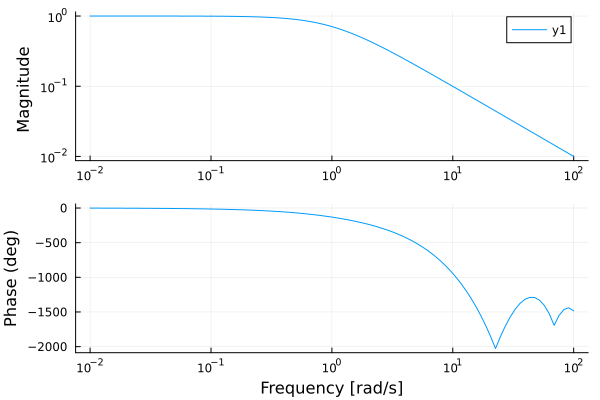

In [22]:
w = exp10.(LinRange(-2,2,100))
bodeplot(delay_siso_tf, w)

In [23]:
# testmimo_freq_resp
w = exp10.(LinRange(-2,2,10))
freqresp(wood_berry, w)

2×2×10 Array{ComplexF64, 3}:
[:, :, 1] =
 12.4313-2.20402im  -17.9795+4.34262im
 6.45681-1.16541im  -18.9152+3.30571im

[:, :, 2] =
 10.3867-5.1827im  -13.3537+9.37895im
 5.57492-2.9683im  -16.0995+8.06846im

[:, :, 3] =
 4.29712-6.54633im  -3.10627+9.40135im
 1.62412-4.7752im   -6.19676+11.3748im

[:, :, 4] =
 0.190665-3.42239im  1.69596+3.70969im
 -2.31095-1.16016im    1.954+5.6218im

[:, :, 5] =
 -0.609851-1.11652im   1.48013-0.221262im
  0.783909+0.618326im   2.2183-0.250236im

[:, :, 6] =
 -0.458323+0.0281868im  -0.520719+0.140405im
  0.293676-0.212413im   -0.781793+0.199879im

[:, :, 7] =
  0.164539+0.0138042im  0.189103+0.0428153im
 -0.113486-0.0642809im  0.282749+0.0654171im

[:, :, 8] =
 -0.0200415-0.0558575im  0.0602249+0.035053im
 -0.0303737+0.0357106im   0.090062+0.0526232im

[:, :, 9] =
   0.0209361+0.0040665im  0.0210585+0.0135532im
 -0.00395567-0.0163775im  0.0315105+0.0203071im

[:, :, 10] =
  0.00388508-0.00660706im  -0.00899771-0.000203154im
 -0.00329842+0.00507779im 

### TestTimeResp

In [32]:
t = 0:10:100
u = ones(100)
y, t, x, uout = lsim(delay_siso_tf,u,t)

ErrorException: type DelayLtiSystem has no field nu1

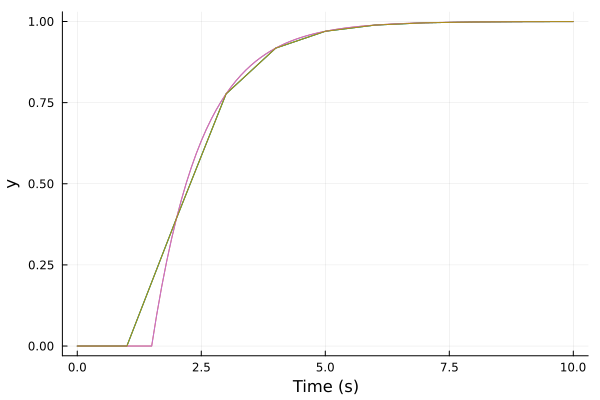

In [49]:
res1 = step(delay_siso_tf, 0:0.1:10)
res2 = step(delay_siso_tf, 0:1:10)
res3 = step(delay_siso_tf, 0:0.01:10)
res.y
plot!(res)
plot!(res2)

In [54]:
show(res2.y)

[0.0 0.0 0.3934701171707952 0.7768701219836066 0.917915094373695 0.9698026491618251 0.9888910143620181 0.9959132295791787 0.9984965605514581 0.9994469148973136 0.9997965302422651]